<a href="https://colab.research.google.com/github/aframuneer26/Deep_Learning_Experiments/blob/main/DL_EXP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

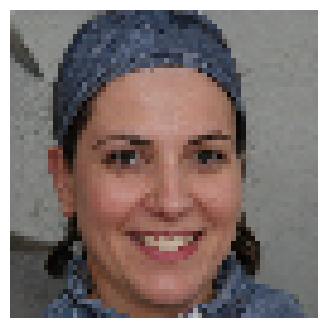

In [ ]:
import os, sys, torch, urllib.request, torchvision
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

# Clone repo if needed
if not os.path.exists('stylegan2-ada-pytorch'):
    os.system('git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git')
sys.path.append('stylegan2-ada-pytorch')

# Download pretrained model
if not os.path.exists('ffhq.pkl'):
    urllib.request.urlretrieve('https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl','ffhq.pkl')

# Generate small image
import legacy
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = legacy.load_network_pkl(open('ffhq.pkl','rb'))['G_ema'].to(dev)
z = torch.randn([1, G.z_dim], device=dev)
label = torch.zeros([1, G.c_dim], device=dev)
img = (G(z, label, truncation_psi=0.5, noise_mode='const') + 1) / 2

# Downsize for speed & save
os.makedirs('generated_images', exist_ok=True)
img_small = torch.nn.functional.interpolate(img, size=64)
save_image(img_small, 'generated_images/fake.png')

# Display image
plt.figure(figsize=(4,4))
plt.imshow(make_grid(img_small, nrow=1).permute(1,2,0).cpu())
plt.axis('off'); plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier().fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0


SVM Accuracy: 1.0
Random Forest Accuracy: 1.0


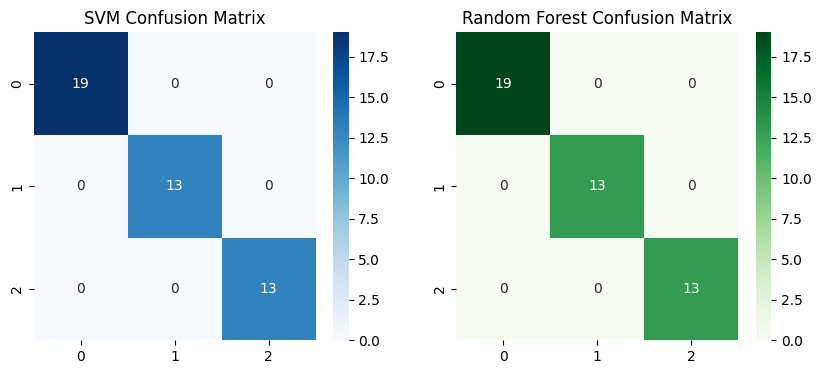

In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 2️⃣ Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_svm)), annot=True, cmap="Blues", ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_rf)), annot=True, cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()
